# EDA of 2022 USDA Food Data

In [2]:
import pandas as pd
from glob import glob

In [4]:
csvs = glob('FoodData_Central_csv_2022-04-28/*.csv')

In [17]:
branded = pd.read_csv([c for c in csvs if 'branded' in c][0], low_memory=False)

In [21]:
branded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628970 entries, 0 to 1628969
Data columns (total 19 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   fdc_id                       1628970 non-null  int64  
 1   brand_owner                  1627121 non-null  object 
 2   brand_name                   1069880 non-null  object 
 3   subbrand_name                57367 non-null    object 
 4   gtin_upc                     1628970 non-null  object 
 5   ingredients                  1623555 non-null  object 
 6   not_a_significant_source_of  51264 non-null    object 
 7   serving_size                 1614945 non-null  float64
 8   serving_size_unit            1603488 non-null  object 
 9   household_serving_fulltext   538917 non-null   object 
 10  branded_food_category        1618501 non-null  object 
 11  data_source                  1628970 non-null  object 
 12  package_weight               461651 non-nu

In [24]:
branded['branded_food_category'].value_counts().head(10)

Popcorn, Peanuts, Seeds & Related Snacks           77192
Candy                                              76252
Cheese                                             63650
Ice Cream & Frozen Yogurt                          50036
Cookies & Biscuits                                 47519
Chips, Pretzels & Snacks                           42837
Breads & Buns                                      38571
Pickles, Olives, Peppers & Relishes                37420
Fruit & Vegetable Juice, Nectars & Fruit Drinks    34844
Cereal                                             34104
Name: branded_food_category, dtype: int64

In [26]:
branded.query('branded_food_category == "Cereal"')['brand_owner'].value_counts()

The Kellogg Company          2958
Post Consumer Brands, LLC    2888
The Quaker Oats Company      1808
General Mills, Inc.          1539
MOM Brands Company           1123
                             ... 
TONY'S                          1
DUNYA HARVEST                   1
CHAPPAQUA CRUNCH                1
HAPPY HEALTH                    1
BLISS GOURMET FOODS             1
Name: brand_owner, Length: 1032, dtype: int64

In [31]:
print(csvs[0])
pd.read_csv(csvs[0]).sort_values('Number of Records', ascending=False)

FoodData_Central_csv_2022-04-28/all_downloaded_table_record_counts.csv


,Table,Number of Records
11,food_nutrient,5917370
6,food_attribute,1907689
5,food,1687318
2,branded_food,1628970
17,food_update_log_entry,1239057
4,fndds_ingredient_nutrient_value,151580
31,sub_sample_result,85773
15,food_portion,56893
30,sub_sample_food,33994
19,input_food,24896


In [33]:
food = pd.read_csv('FoodData_Central_csv_2022-04-28/food.csv')

In [36]:
foundation_food = pd.read_csv('FoodData_Central_csv_2022-04-28/foundation_food.csv')

In [42]:
food.shape, branded.shape, foundation_food.shape

((1687318, 5), (1628970, 19), (184, 3))

In [40]:
food['data_type'].value_counts()

branded_food                1628970
sub_sample_food               33994
sr_legacy_food                 7793
survey_fndds_food              7083
market_acquistion              5945
sample_food                    2447
agricultural_acquisition        810
foundation_food                 250
experimental_food                26
Name: data_type, dtype: int64

In [47]:
sub_sample_food = pd.read_csv('FoodData_Central_csv_2022-04-28/sub_sample_food.csv')

In [46]:
hummus = food.query('data_type == "sub_sample_food" and description == "Hummus"')['fdc_id'].unique()

In [53]:
hummus_sample = sub_sample_food.query('fdc_id in @hummus')['fdc_id_of_sample_food'].unique()

In [54]:
sample_food = pd.read_csv('FoodData_Central_csv_2022-04-28/sample_food.csv')

In [56]:
food_portion = pd.read_csv('FoodData_Central_csv_2022-04-28/food_portion.csv')

In [61]:
food.head()

,fdc_id,data_type,description,food_category_id,publication_date
0,1105904,branded_food,WESSON Vegetable Oil 1 GAL,NaN,2020-11-13
1,1105905,branded_food,SWANSON BROTH BEEF,NaN,2020-11-13
2,1105906,branded_food,CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER,NaN,2020-11-13
3,1105907,branded_food,CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI,NaN,2020-11-13
4,1105898,experimental_food,Discrepancy between the Atwater factor predict...,NaN,2020-10-30


In [64]:
branded_full = branded.merge(food, on=['fdc_id'], how='left', validate='1:1')

In [70]:
pd.set_option('display.max_columns', 500)

In [77]:
cheerios = branded_full.loc[branded_full['description'].str.lower().str.contains('cheerios').fillna(False)]

In [81]:
cheerios['description'].value_counts()

Cheerios Cereal                                                                    46
Honey Nut Cheerios Cereal                                                          32
Chocolate Peanut Butter Cheerios Cereal                                            20
Multi Grain Cheerios Gluten Free Breakfast Cereal                                  17
Blueberry Cheerios Cereal                                                          17
                                                                                   ..
GMILLS CHEERIOS SWEETENED CRN OAT CEREAL BANANA NUT                                 2
GENERAL MILLS, CHEERIOS, SWEETENED WHOLE GRAIN OAT CEREAL, HONEY NUT, HONEY NUT     1
GMILLS CHEERIOS CEREAL RTE PUMPKIN SPICE                                            1
GMILLS CHEERIOS SWEETENED WHL GRN OAT CEREAL PUMPKIN SPICE                          1
GMILLS CHEERIOS SWEETENED WHL GRN OAT CEREAL STRWBRY FAMILY SZ                      1
Name: description, Length: 79, dtype: int64

In [92]:
branded_full.query('description == "Cheerios Cereal"')['ingredients'].value_counts()

WHOLE GRAIN OATS, CORN STARCH, SUGAR, SALT, TRIPOTASSIUM PHOSPHATE. VITAMIN E (MIXED TOCOPHEROLS) ADDED TO PRESERVE FRESHNESS.VITAMINS AND MINERALS: CALCIUM CARBONATE, IRON AND ZINC (MINERAL NUTRIENTS), VITAMIN C (SODIUM ASCORBATE), A B VITAMIN (NIACINAMIDE), VITAMIN B6 (PYRIDOXINE HYDROCHLORIDE), VITAMIN A (PALMITATE), VITAMIN B1 (THIAMIN MONONITRATE), A B VITAMIN (FOLIC ACID), VITAMIN B12, VITAMIN D3.    46
Name: ingredients, dtype: int64

In [104]:
branded_full_dedup = branded_full.drop_duplicates(subset=['description','ingredients']).copy()

In [116]:
branded_full_dedup.columns

Index(['fdc_id', 'brand_owner', 'brand_name', 'subbrand_name', 'gtin_upc',
       'ingredients', 'not_a_significant_source_of', 'serving_size',
       'serving_size_unit', 'household_serving_fulltext',
       'branded_food_category', 'data_source', 'package_weight',
       'modified_date', 'available_date', 'market_country',
       'discontinued_date', 'preparation_state_code', 'trade_channel',
       'data_type', 'description', 'food_category_id', 'publication_date'],
      dtype='object')

SyntaxError: invalid syntax (2747850289.py, line 1)

In [163]:
    # .str.replace("\([^)]*\)", "", regex=True) \
branded_split = branded_full_dedup.set_index('fdc_id')['ingredients'] \
    .str.split(',').explode() \
    .str.lower() \
    .str.replace('(','', regex=False) \
    .str.replace(')','', regex=False) \
    .str.replace(':','', regex=False) \
    .str.replace('.','', regex=False) \
    .str.replace('ingredients','', regex=False) \
    .str.strip()

In [164]:
top100_ingredients = branded_split.value_counts().head(100).index

In [165]:
branded_split = branded_split.to_frame('ingredient')

In [166]:
branded_split_ingedients = branded_full_dedup[['fdc_id',
                                               'brand_owner',
                                               'branded_food_category',
                                               'description']].copy()

In [178]:
from tqdm.notebook import tqdm

In [180]:
for ing in tqdm(top100_ingredients):
    fdc_id_list = branded_split.query('ingredient == @ing').index.tolist()
    branded_split_ingedients[ing] = branded_split_ingedients['fdc_id'].isin(fdc_id_list)

  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_26646/4206120022.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  branded_split_ingedients[ing] = branded_split_ingedients['fdc_id'].isin(fdc_id_list)
/tmp/ipykernel_26646/4206120022.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  branded_split_ingedients[ing] = branded_split_ingedients['fdc_id'].isin(fdc_id_list)


In [186]:
branded_split_ingedients['n_top100_ing'] = branded_split_ingedients[top100_ingredients].sum(axis=1)

<AxesSubplot:ylabel='Frequency'>

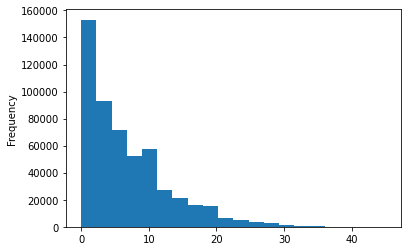

In [189]:
branded_split_ingedients['n_top100_ing'].plot(kind='hist', bins=20)

In [191]:
(branded_split_ingedients['n_top100_ing'] == 0).mean()

0.11301123135375352

In [194]:
branded_full.query('fdc_id == 1105904')

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,data_type,description,food_category_id,publication_date
0,1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,00027000612323,Vegetable Oil,NaN,15.0,ml,NaN,Oils Edible,GDSN,NaN,2020-10-02,2020-11-13,United States,NaN,NaN,NaN,branded_food,WESSON Vegetable Oil 1 GAL,NaN,2020-11-13


In [ ]:
# branded_split_ingedients.query('n_top100_ing == 0')

# Cluster Based on Ingredients

In [199]:
X = branded_split_ingedients[top100_ingredients].astype('int').values

In [206]:
# from sklearn.manifold import TSNE

# n_components = 2
# tsne = TSNE(n_components, n_jobs=4, n_iter=250)
# tsne_result = tsne.fit_transform(X)
# tsne_result.shape

In [207]:
from sklearn.cluster import KMeans

In [208]:
km = KMeans(25)

In [210]:
result = km.fit_transform(X)

In [215]:
import numpy as np

In [218]:
branded_split_ingedients['cluster'] = np.argmax(result, axis=1)

In [228]:
branded_split_ingedients.groupby('cluster')[top100_ingredients].sum().T

cluster,0,1,2,3,4,6,7,8,9,10,11,13,14,16,17,18,19,20,21,23,24
salt,631,0,5066,9156,269,34,2160,0,11297,9815,136581,1624,8609,55,13789,22172,52589,19,0,1505,1012
sugar,1059,302,3626,7889,214,14,2153,2,11043,5660,75560,818,8546,53,14882,14831,70776,0,2,1343,1339
water,4,302,1122,5147,52,34,2103,2,7139,8457,100756,1684,8512,2,9856,15914,30770,20,0,964,1402
citric acid,52,224,997,2638,8,14,1366,0,4726,1468,66731,1049,7526,0,9933,7122,20280,19,0,0,14
natural flavor,116,61,2389,2391,3,11,968,0,2129,3568,42125,513,3968,0,8469,3014,16187,4,0,1225,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
calcium chloride,0,2,73,80,0,5,130,0,54,332,9653,181,497,0,414,694,505,1,0,15,5
enriched flour wheat flour,369,81,439,1943,82,0,0,0,2219,1223,49,0,1532,15,2,3554,1409,3,2,173,95
monosodium glutamate,0,0,799,285,0,0,111,0,389,225,7614,192,322,4,1139,1221,331,2,0,39,0
gelatin,90,2,204,58,0,0,98,0,843,41,2239,137,225,0,815,126,7683,2,0,38,62


In [ ]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)